# Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPRegressor as rede_neural
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.stats import f_oneway
from sklearn.model_selection import GridSearchCV
import Classes as Cls
import pickle

# Funções

## Plot

In [2]:
def plot_(resultados_dataframe1,resultados_dataframe2 = False):
  aux_bool = True
  if(type(resultados_dataframe2)==type(aux_bool)):
    resultados_dataframe2 = resultados_dataframe1
    aux_bool = False


  fig=plt.figure(figsize=(10,8))
  plt.subplots_adjust(wspace=0.1, hspace=0.3)
  fig.suptitle('Distribuição das Distâncias Entre os Pontos')

  numb=1
  dist = {}
  
  for coluna in list(resultados_dataframe1)[:6]:
    dist_aux=[]
    ax=fig.add_subplot(2,3,numb)
    ax.set_title(coluna)

    for i in range(len(resultados_dataframe1[coluna])):
      if(aux_bool):
        i = 0
      else:
        i = i
      for j in range(i,len(resultados_dataframe2[coluna])):
        dist_aux.append(np.linalg.norm(np.array(resultados_dataframe1.loc[i,coluna]) - np.array(resultados_dataframe2.loc[j,coluna])))

    sns.histplot(dist_aux, kde=True, element='step')
    plt.tick_params(axis='y', labelsize=0, length=0)
    plt.ylabel([], fontsize=0)
    plt.xlabel('Distância')
    dist[coluna] = dist_aux
    numb+=1
  plt.show()
  return pd.DataFrame(dist)

# Importação dos modelos de aprendizado

In [4]:
n=10

funcao_demanda = lambda i,j: [(i*6-j*2)**2+10000]

x = [[j] for j in range(52) for i in range(n)]

y = pd.read_csv('demandas')['y'].values

In [5]:
with open("modelos_binarios", "rb") as arquivo_binario:
  while True:
    try:
        modelos = pickle.load(arquivo_binario)
    except EOFError:
        break

In [6]:
resultados = pd.DataFrame({'Random forest': modelos.medias_desempenho[0],
                           'Rede Neural': modelos.medias_desempenho[1],})

[]

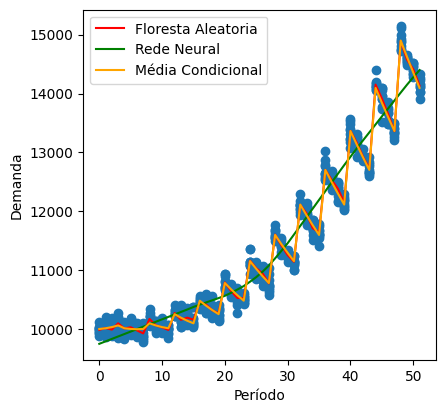

In [7]:
fig=plt.figure(figsize=(10,10))

x_unique = [[i] for i in range(52)]

medias_reais = [funcao_demanda(i,j) for i in range(13) for j in range(1,5)]

ax=fig.add_subplot(2,2,1)
plt.scatter(x,y)
plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(0,x_unique).reshape(-1,1)),color='red',label='Floresta Aleatoria')

plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(1,x_unique).reshape(-1,1)),color='green',label='Rede Neural')

plt.plot(x_unique,medias_reais,color='orange',label='Média Condicional')

plt.ylabel('Demanda')
plt.xlabel('Período')


plt.legend()
plt.plot()

[]

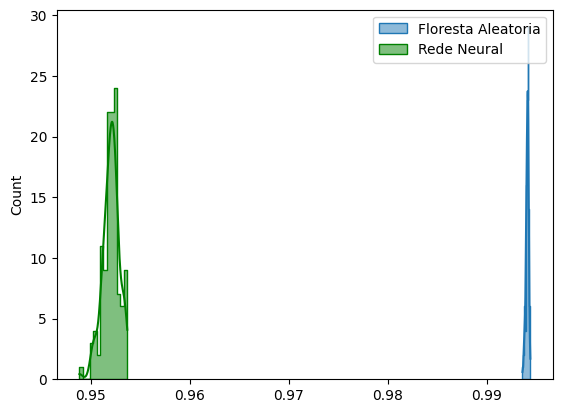

In [8]:
sns.histplot(modelos.medias_desempenho[0], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(modelos.medias_desempenho[1], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.plot()

In [9]:
resultados.describe()

,Random forest,Rede Neural
count,120.000000,120.000000
mean,0.994093,0.952044
std,0.000144,0.000845
min,0.993612,0.948869
25%,0.994014,0.951630
50%,0.994103,0.952095
75%,0.994184,0.952527
max,0.994410,0.953700


## Analise de Normalidade dos dados de desempenho médio

In [10]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(modelos.medias_desempenho[0])
_,p['Rede Neural'] = shapiro(modelos.medias_desempenho[1])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Média amostral de desempenho da {i} segue uma normal')

Média amostral de desempenho da Random Forest não segue uma normal
Média amostral de desempenho da Rede Neural não segue uma normal


## Analise de comparação dos dados de desempenho médio

In [11]:
_,aux = f_oneway(modelos.medias_desempenho[0],modelos.medias_desempenho[1])

In [12]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes


# Resultados Modelo PI

## Importação dos Dados

In [103]:
resultados_1 = pd.read_csv('Resultados_PI_RR').iloc[:,1:]
resultados_2 = pd.read_csv('Resultados_PI_RN').iloc[:,1:]

In [104]:
resultados_dataframe_1 = {}
for column in range(len(resultados_1.columns[:-1])):
    coluna_aux = []
    for element in range(len((resultados_1.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_1.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_1[resultados_1.columns[column]] = coluna_aux

resultados_dataframe_1['ObjVal'] = resultados_1['ObjVal']

resultados_dataframe_1 = pd.DataFrame(resultados_dataframe_1)

In [105]:
resultados_dataframe_2 = {}
for column in range(len(resultados_2.columns[:-1])):
    coluna_aux = []
    for element in range(len((resultados_2.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_2.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_2[resultados_2.columns[column]] = coluna_aux

resultados_dataframe_2['ObjVal'] = resultados_2['ObjVal']

resultados_dataframe_2 = pd.DataFrame(resultados_dataframe_2)
        

## Analise das Distancias Entre os Pontos

### distancia entre os pontos provindos dos resultados do Random Forest, ou seja, as demandas foram obtidas pelo Random forest

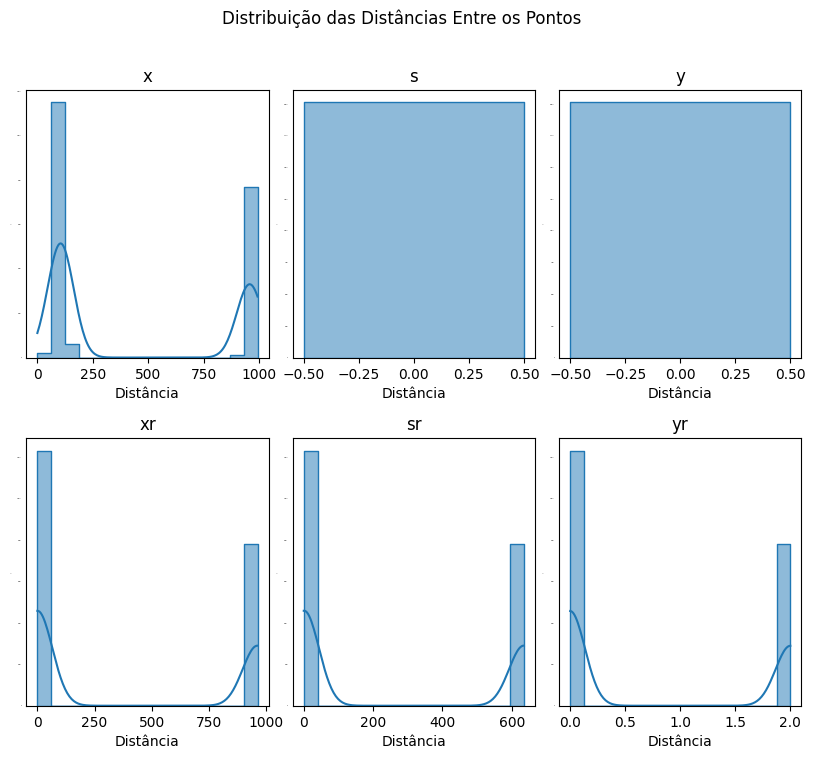

In [106]:
dist_1 = plot_(resultados_dataframe_1)

In [107]:
dist_1.describe()

,x,s,y,xr,sr,yr
count,20100.000000,20100.0,20100.0,20100.000000,20100.000000,20100.000000
mean,434.006723,0.0,0.0,373.527041,246.652449,0.775224
std,415.902066,0.0,0.0,468.249031,308.459944,0.974435
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,101.806238,0.0,0.0,0.956941,1.205015,0.000000
50%,114.933166,0.0,0.0,1.212388,1.474670,0.000000
75%,953.015701,0.0,0.0,961.995107,634.291576,2.000000
max,991.900633,0.0,0.0,962.778271,634.905826,2.000000


### distancia entre os pontos provindos dos resultados da Rede Neural, ou seja, as demandas foram obtidas pelo Rede Neural

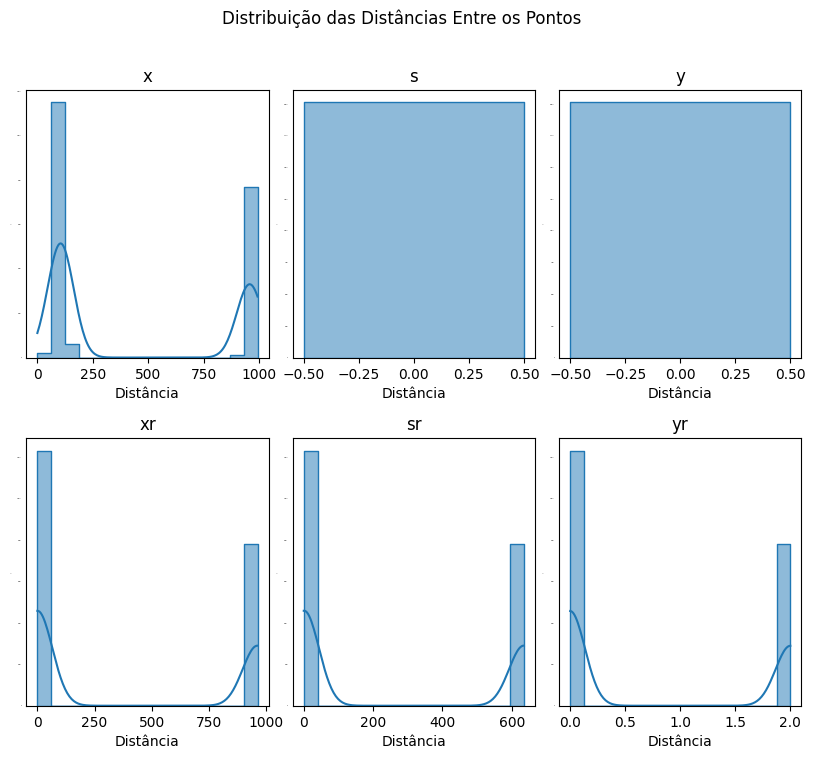

In [108]:
dist_2 = plot_(resultados_dataframe_2)

In [109]:
dist_2.describe()

,x,s,y,xr,sr,yr
count,20100.000000,20100.0,20100.0,20100.000000,20100.000000,20100.000000
mean,434.006723,0.0,0.0,373.527041,246.652449,0.775224
std,415.902066,0.0,0.0,468.249031,308.459944,0.974435
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,101.806238,0.0,0.0,0.956941,1.205015,0.000000
50%,114.933166,0.0,0.0,1.212388,1.474670,0.000000
75%,953.015701,0.0,0.0,961.995107,634.291576,2.000000
max,991.900633,0.0,0.0,962.778271,634.905826,2.000000


In [110]:
np.quantile(np.array(dist_2['x']), 0.9)

963.6150151057091

### distancia entre os pontos provindos dos resultados do Random Forest e entre da Rede Neural

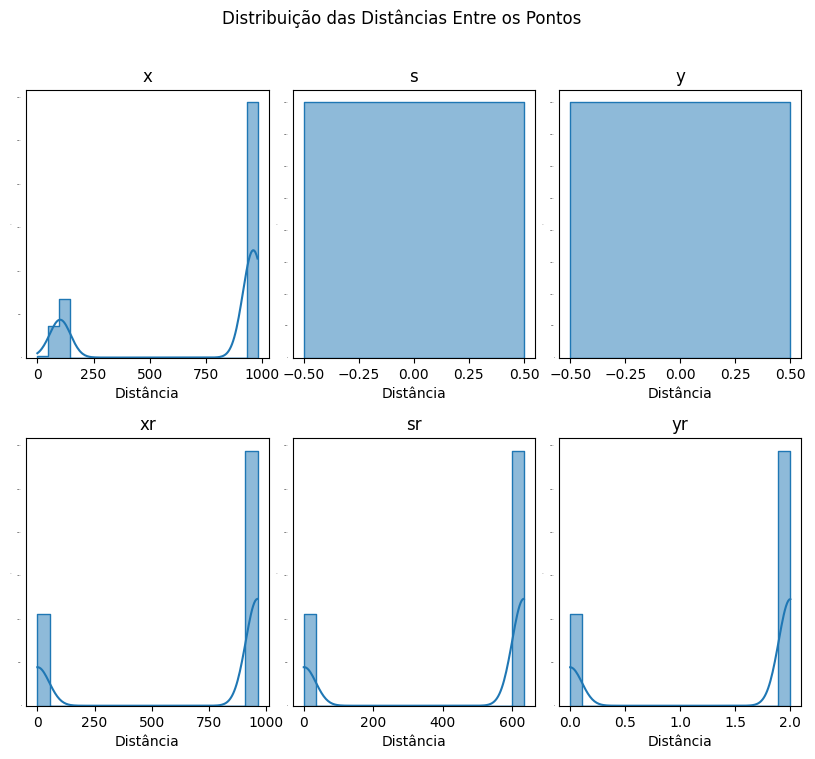

In [111]:
dist_3 = plot_(resultados_dataframe_1,resultados_dataframe_2)

In [112]:
dist_3.describe()

,x,s,y,xr,sr,yr
count,40000.000000,40000.0,40000.0,40000.000000,40000.000000,40000.000000
mean,732.308841,0.0,0.0,707.523940,466.634075,1.470000
std,380.219692,0.0,0.0,424.199269,279.443340,0.882677
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,117.011097,0.0,0.0,1.408137,1.549390,0.000000
50%,957.690486,0.0,0.0,962.159275,634.351774,2.000000
75%,964.643962,0.0,0.0,962.296452,634.487227,2.000000
max,979.295775,0.0,0.0,962.666569,634.779337,2.000000


In [113]:
np.quantile(np.array(dist_3['xr']), 0.98)

962.5486383979211

## Analise dos valores objetivos obtidos


[]

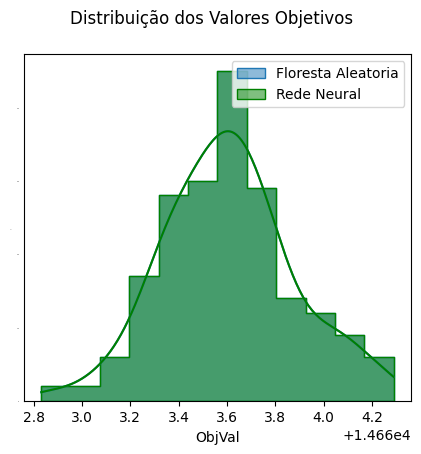

In [114]:
fig=plt.figure(figsize=(5,4.5))
fig.suptitle('Distribuição dos Valores Objetivos')

sns.histplot(resultados_dataframe_2['ObjVal'], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(resultados_dataframe_1['ObjVal'], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.ylabel([], fontsize=0)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.plot()

Random Forest

In [115]:
resultados_dataframe_1['ObjVal'].describe()

count      200.000000
mean     14663.604436
std          0.272156
min      14662.831855
25%      14663.414583
50%      14663.599559
75%      14663.771445
max      14664.289110
Name: ObjVal, dtype: float64

Rede Neural

In [116]:
resultados_dataframe_2['ObjVal'].describe()

count      200.000000
mean     14663.604436
std          0.272156
min      14662.831855
25%      14663.414583
50%      14663.599559
75%      14663.771445
max      14664.289110
Name: ObjVal, dtype: float64

In [117]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(resultados_dataframe_1['ObjVal'])
_,p['Rede Neural'] = shapiro(resultados_dataframe_2['ObjVal'])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Média amostral de desempenho da {i} segue uma normal')

Média amostral de desempenho da Random Forest segue uma normal
Média amostral de desempenho da Rede Neural segue uma normal


In [118]:
_,aux = f_oneway(resultados_dataframe_1['ObjVal'].values,resultados_dataframe_2['ObjVal'].values)

In [119]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuições diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição
